<div style="text-align: center;">
<h2>INFSCI 2595 Machine Learning - Spring 2019 </h2>
<h1 style="font-size: 250%;">Assignment #1</h1>
<h3>Due: Feb 17, 2019</h3>
<h3>Total points: 100 </h3>
</div>

In [4]:
# Type in your information in the double quotes
firstName = ""
lastName = ""
pittID = ""

In [5]:
#Libraries 
%matplotlib inline
import numpy as np 
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from IPython.display import Image
import statsmodels.formula.api as smf
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets

<h3>  Problem #1. K-nearest neighbors  [13 points] </h3> 

In this problem, do not use build-in  functions for classification (i.e. do not use sklearn.neighbors). You will be required to do the calculations and make the predictions based on your understanding of how the technique works. You can use pen and paper to do the calculations (and upload image of your solutions) or write the code of detailed calculations and prediction.

The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.
Suppose we wish to use this data set to make a prediction for Y when X1 = -1, X2 = 1 X3 = 2 using K-nearest neighbors.

|Obs.|X1|X2|X3|Y
|--|-------------------------------|
|1 |0|3|0|Green|
|2 |2|0|0|Green|
|3|0|1|3|Green|
|4|0|1|2|Red|
|5|-1|0|1|Red|
|6|1|1|1|Green|

<b>Problem #1-1.</b> Compute the Euclidean distance between each observation and the test point. Your output should be a vector, where each number in the vector represents the distance between the observations and the test point [5 pts]. 


In [10]:
# Answer code 
# here is all data 
all_points = np.array([[0,3,0],[2,0,0],[0,1,3],[0,1,2],[-1,0,1],[1,1,1]])
test_point = np.array([[-1,1,2]])
data = np.concatenate((all_points, test_point), axis=0)
# here colomn names for data frame 
names = np.array(['Obs.1','Obs.2','Obs.3','Obs.4','Obs.5','Obs.6','T_Point'])
# creating empty 2d array 
array = [[0 for x in range(len(data))] for y in range(len(data))] 
#### Calculating Euclidean distance
i = 0
while i < len(data)-1:  
    j = 1
    while j < len(data):      
        dist = (((data[i][0]-data[j][0])**2)+ ((data[i][1]-data[j][1])**2)+((data[i][2]-data[j][2])**2))**(.5)
        array[i][j] = dist
        j= j+1  
    i = i+1    
### Creating symemtical matrix
for i in range(len(data)):
    for j in range(i, len(data)):
        array[j][i] = array[i][j]
# printing
print("                        Euclidean distance table:")
print (pd.DataFrame(array,columns=names, index=names)  )


                        Euclidean distance table:
            Obs.1     Obs.2     Obs.3     Obs.4     Obs.5     Obs.6   T_Point
Obs.1    0.000000  3.605551  3.605551  2.828427  3.316625  2.449490  3.000000
Obs.2    3.605551  0.000000  3.741657  3.000000  3.162278  1.732051  3.741657
Obs.3    3.605551  3.741657  0.000000  1.000000  2.449490  2.236068  1.414214
Obs.4    2.828427  3.000000  1.000000  0.000000  1.732051  1.414214  1.000000
Obs.5    3.316625  3.162278  2.449490  1.732051  0.000000  2.236068  1.414214
Obs.6    2.449490  1.732051  2.236068  1.414214  2.236068  0.000000  2.236068
T_Point  3.000000  3.741657  1.414214  1.000000  1.414214  2.236068  0.000000


<b>Problem #1-2 [4 points].</b> What is our prediction with K = 1? 

In [11]:
#Answer code
from sklearn.neighbors import KNeighborsClassifier
Y =  np.array([0,0,0,1,1,0]) # Where 0 represents Green color and 1 represents Red color. 
all_points = np.array([[0,3,0],[2,0,0],[0,1,3],[0,1,2],[-1,0,1],[1,1,1]])
test_point = np.array([[-1,1,2]])
def printcolor(x,k):
    print ("When k is equal to %d, prediction for Y when X1 = X2 = X3 = 0 is:" %k ) 
    if x == [0]:
        print ("Green")
    elif x == [1]:
        print ("Red")
    else:
        print ("Something went wrong sorry.....")
k = 1
knn=KNeighborsClassifier(n_neighbors= k)  
knn.fit(all_points,Y)
predict = knn.predict(test_point)
print ("Using KNeighborsClassifier")
printcolor(predict,k)
print ("==========================================================================")
print ("Using Euclidean distance table")
df = pd.DataFrame(np.vstack((np.delete(pd.DataFrame(array,columns=names, index=names)["T_Point"].values, 6, 0),Y)).T,columns= ["Distance","Y" ] )
#predict = df["Distance"].min()
Small = df.nsmallest(1, 'Distance')
Y = Small['Y'].values
printcolor(Y,k)

Using KNeighborsClassifier
When k is equal to 1, prediction for Y when X1 = X2 = X3 = 0 is:
Red
Using Euclidean distance table
When k is equal to 1, prediction for Y when X1 = X2 = X3 = 0 is:
Red


<b>Problem #1-3. [4 points]</b> What is our prediction with K = 3? K = 5? 

In [12]:
# Answer code 
from sklearn.neighbors import KNeighborsClassifier

k = 3
Y =  np.array([0,0,0,1,1,0])
knn=KNeighborsClassifier(n_neighbors= k)  
knn.fit(all_points,Y)
predict = knn.predict(test_point)
print ("Using KNeighborsClassifier")
printcolor(predict,k)
print ("==========================================================================")
print ("Using Euclidean distance table")
from scipy import stats
Y= np.array(stats.mode(df.nsmallest(k, 'Distance')['Y'].values))[0]
printcolor(Y,k)

Using KNeighborsClassifier
When k is equal to 3, prediction for Y when X1 = X2 = X3 = 0 is:
Red
Using Euclidean distance table
When k is equal to 3, prediction for Y when X1 = X2 = X3 = 0 is:
Red


In [13]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
Y =  np.array([0,0,0,1,1,0])
knn=KNeighborsClassifier(n_neighbors= k)  
knn.fit(all_points,Y)
predict = knn.predict(test_point)
print ("Using KNeighborsClassifier")
printcolor(predict,k)
print ("==========================================================================")
print ("Using Euclidean distance table")
from scipy import stats
Y= np.array(stats.mode(df.nsmallest(k, 'Distance')['Y'].values))[0]
printcolor(Y,k)

Using KNeighborsClassifier
When k is equal to 5, prediction for Y when X1 = X2 = X3 = 0 is:
Green
Using Euclidean distance table
When k is equal to 5, prediction for Y when X1 = X2 = X3 = 0 is:
Green


<b>Problem #1-4 [4 points].</b>  For KNN classification, discuss the impact of choosing the parameter K on the model performance. Highlight the different trade-offs.

<h3>Answer:   </h3> <br>
**In the KNN model: **
The value of K has a significant impact on prediction. Changing K may lead to different predictions. We try to avoid very low values of K as they may overfit the model, and very high values of K would underfit the model.


<h3>  Problem #2. Linear regression calculations of coefficients and $R^2$ [17 points] </h3>  
-  You should not use built-in functions for linear regression in this question's parts (2-1) and (2-2). Do the calculations manually or explicitly by code. <br>
- Feel free to select any type of submission you are comfortable with (Since it may require some mathematical formula and symbols; MS Word, or scanned version of your writing will be fine) 

<b>Problem #2-1.</b> Find the least squared fit of a linear regression model using the following traning data. Coefficients are obtained using the formulas [7pts]: 
\begin{array} \\
    \hat{\beta}_0 = \bar{y} - \hat{\beta}_1\bar{x}, \\ \\
    \hat{\beta}_1 = \frac{\sum_{i=1}^n y_i x_i - \bar{y}\sum_{i=1}^n x_i}{\sum_{i=1}^n x^2 - \bar{x}\sum_{i=1}^n x_i} \\ \\
    \text{where }\bar{x} = \frac{\sum_{i=1}^y x_i}{n} \text{ and } \bar{y} = \frac{\sum_{i=1}^y y_i}{n} \\
\end{array}

|Smoke index(x)|Lung cancer mortality index(y)|
|:--:|:-------------------------------:|
|127|115|
|121|128|
|94|128|
|126|156|
|102|101|
|111|128|
|95|115|
|89|105|
|101|87|

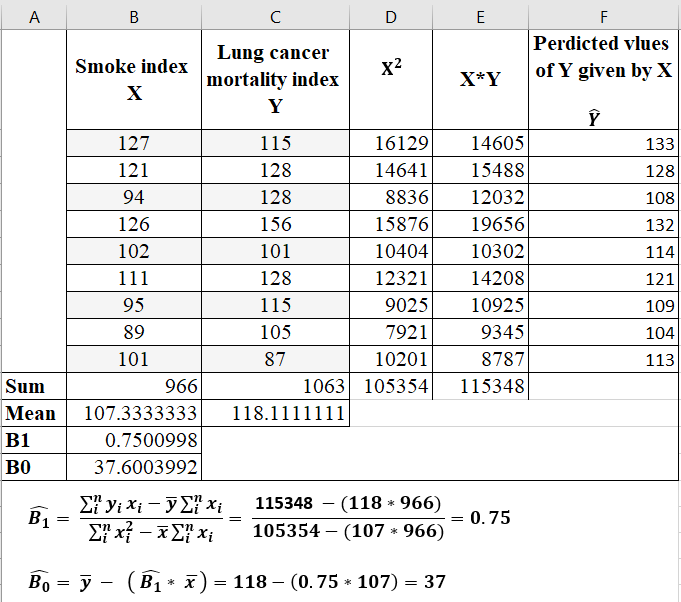

In [14]:

Image(filename='image1.png')


<b>Problem #2-2.</b> Given the test data below, compute the TSS, RSS and the R-squared metric of the fitted model [6pts]

|Xi|Yi|
|:--:|:-------------------------------:|
|90|103|
|106|131|
|105|85|
|115|99|
|113|144|

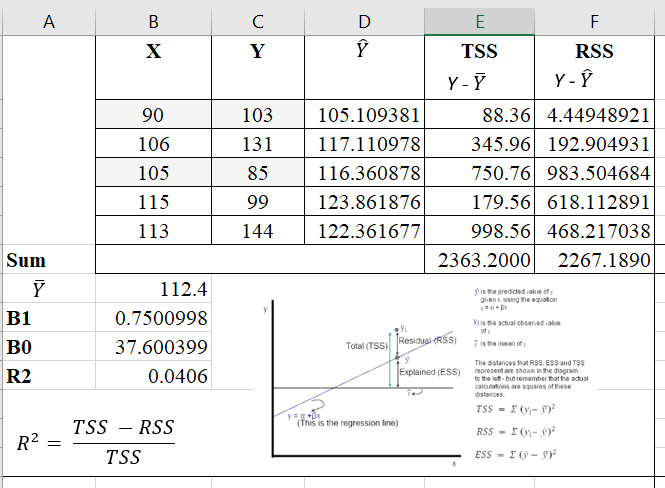

In [15]:

Image(filename='image3.png')

<b>Problem #2-3.</b> Check your calculations by finding the coefficients and the $R^2$ score using scikit-learn library (from sklearn.linear_model import LinearRegression) [4pts]

In [16]:
X_train=np.array([127,121,94,126,102,111,96,89,101])
Y_train=np.array([115,128,128,156,101,128,115,105,87])
#from sklearn.linear_model import LinearRegression
X_train=X_train.reshape(-1,1); X_train=X_train.reshape(-1,1)
linreg= LinearRegression().fit(X_train, Y_train)

print("The intercept using sklearn: ", linreg.intercept_) 
print("The coefficient using sklearn:",linreg.coef_)
Image(filename='image1.png')


X_test=np.array([90,106,105,115,113])
Y_test=np.array([103,131,85,99,144])

X_test=X_test.reshape(-1,1); X_test=X_test.reshape(-1,1)
scoreR=linreg.score(X_test, Y_test)
print("The R sqaured score is using sklearn,", scoreR)

print("Answers are almost the same as the calculated one, minor differences due to numbers approaximations in coefficient values.")

The intercept using sklearn:  36.5560205184
The coefficient using sklearn: [ 0.75904428]
The R sqaured score is using sklearn, 0.0423976474073
Answers are almost the same as the calculated one, minor differences due to numbers approaximations in coefficient values.


<h3>  Problem #3. Linear Regression Optimization with Gradient Descent  [20 points] </h3> 


In this question, you will create a synthetic dataset, then use gradient descent to find the coefficients' estimates. We will see how the RSS changes with iterations of the gradient descent. 


<b>Problem #3-1.</b> Create a label $y$, which is related to a feature $X$, such that $y=10 + 5 X + \epsilon$. $\epsilon$ is a Gaussian noise (normal distribution) with mean 0 and unit variance. X is generated from a uniform distribution as given below. The number of observations to be generated is 100 [4pts].

In [17]:

NumberObservations=100
minVal=1
maxVal=20
X = np.random.uniform(minVal,maxVal,(NumberObservations,1))
print(X.shape)
#Add you code below to define error and Y based on the information above

(100, 1)


In [18]:
beta0=10
beta1=5
stdDeviation=1
ErrMean=0

error = np.random.normal(loc=ErrMean, scale=stdDeviation,size=(NumberObservations,1))

y=beta0+beta1*X +error

<b>Problem #3-2 [12 Points].</b> Now assume you do not know the actual relationship between X and y, use the generated noisy data and find the coefficients of a linear regression model obtained by gradient descent. Do not use any built-in functions for gradient descent. Write the code based on your understanding of the algorithm. The cost function is the RSS, set the number of iterations to 10000 and the learning rate to 0.00001.

- Print the estimated coefficients of the model obtained using gradient descent (7 pts)
- Record the RSS in each iteration of the gradient descent and plot the last 6000 values of the RSS. Comment on figure. (3 pts)
- Comment on how close the obtained coefficients are from the actual ones (3pts)

(2, 1)
[[ 9.79261862]
 [ 5.02693235]]


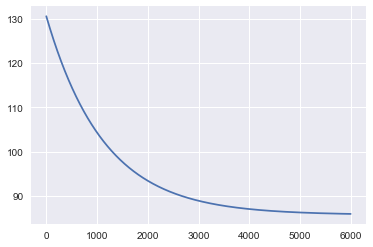

In [19]:
# write your code here.
#Make sure that x has two indices

n_iter=10000
eta=0.00001 #learning rate =10^-4 worked well
RSS=[]
w=np.random.normal(loc=0, scale=stdDeviation,size=(1 + X.shape[1],1)) 
# random initialization, with size equals to size of x + 1 (since we also have bias)
print(w.shape)
for i in range(n_iter):

    output = np.dot(X, w[1:]) + w[0]
    output=output.reshape(-1,1)
 
    errors = (output-y)

    w[1:] =w[1:]- eta * 2*np.dot(X.T,errors)
    w[0] = w[0] - eta * 2*errors.sum()
    RSS1 = (errors**2).sum() 
    RSS.append(RSS1)

print(w)

plt.plot(RSS[len(RSS)-6000:])


<b>Problem #3-1 [5 Points].</b> Repeat (3-1) and (3-2) but increase the standard deviation of the error to 100. Comment on output coefficient estimates. (3pts)

(2, 1)
[[ 30.90857242]
 [  4.07452777]]


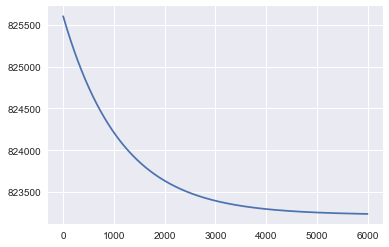

In [20]:
beta0=10
beta1=5
stdDeviation=100
ErrMean=0

error = np.random.normal(loc=ErrMean, scale=stdDeviation,size=(NumberObservations,1))

y=beta0+beta1*X +error
n_iter=10000
eta=0.00001 #learning rate =10^-4 worked well
RSS=[]
w=np.random.normal(loc=0, scale=stdDeviation,size=(1 + X.shape[1],1)) 
# random initialization, with size equals to size of x + 1 (since we also have bias)
print(w.shape)
for i in range(n_iter):

    output = np.dot(X, w[1:]) + w[0]
    output=output.reshape(-1,1)
 
    errors = (output-y)

    w[1:] =w[1:]- eta * 2*np.dot(X.T,errors)
    w[0] = w[0] - eta * 2*errors.sum()
    RSS1 = (errors**2).sum() 
    RSS.append(RSS1)

print(w)

plt.plot(RSS[len(RSS)-6000:])


Due to the increased variance of the error the coefficent estimate becomes far from the actual ones.

======================================================================================================================= <br>=======================================================================================================================

<h3>  Problem #4. This question involves the use of multiple linear regression on the Boston dataset [30 points]</h3> <br>
In this part, you should download and analyze **"Boston House Prices"** dataset. <br>
- Whole dataset contains 14 attributes, (13 numeric/categorical predictive and 1 target value)  what is a abbreviation of the target value? 
- The target value is MEDV => Median value of owner-occupied homes in $1000's
  
Use a code below to download the  dataset: 

In [21]:
dataset = load_boston()
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


Print and read the description of the dataset then answer the following questions. 



In [6]:
#Code
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

=======================================================================================================================

<b>Problem #4-1 </b> Generate descriptive statistics using DataFrame. (hint: use "DataFrame . describe" method)<br>

Follow two steps to answer questions [4pts].
- Create a DataFrame usnig "data" from the dataset with columns using "feature_names".
- Generate descriptive statistics 

<b> Answer the following questions:</b> 

-  Which feature has the lowest range (minimum and maximum value)?

-  Which feature has the higest mean?  

-  Which feature has a highest variance? 

In [29]:
#Code
DataFrame = pd.DataFrame(dataset.data, columns= dataset.feature_names)
DataFrame.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [30]:
list_range = []
for i in range(len(DataFrame.columns)):
    list_range.append(max(DataFrame.iloc[:,i])-min(DataFrame.iloc[:,i]))
indexes = [k for k,x in enumerate(list_range) if x == min(list_range)]
indexes

[4]

In [31]:
list_var = []
for i in range(len(DataFrame.columns)):
    list_var.append(np.var(DataFrame.iloc[:,i]))
indexes = [k for k,x in enumerate(list_var) if x == max(list_var)]
indexes


[9]

<h3>Answer:   </h3> <br>
<b> 
Which feature has the lowest range (minimum and maximum value)?

- Feature *NOX* has the lowest range

Which feature has the higest mean?

- Feature *TAX* has the higest mean

Which feature has a lowest standard deviation?

 - Feature *TAX* has a highest variance

 </b>

=======================================================================================================================

<b>Problem #4-2</b> Feature Scaling

<b> Answer the following questions [4pts]:</b> 

- From the information above, Do you recommend **feature scaling** ? Explain.  

- What is a difference between MinMaxScaler and StandardScaler? 

<h3>Answer:   </h3> <br>
<b> 

- It is recommended to try feature scaling, especially if we will try non-parametric models, since the different features have different scale.  This is also essential if we use gradient descent. For OLS, scaling features is not expected to matter since coefficents will take care of this issue.

- MinMaxScaler scales a feature to the range of 0 to 1. 

- StandardScaler standardizes the features with zero mean and unit variance.
</b> 

=======================================================================================================================

<b>Problem #4-3</b> Calculate and report **correlations** between variables 

Follow the following steps to answer questions.

- Add target to the dataFrame.

- Find the correlation matrix that shows the correlation between each pair of variables in the dataframe. <br>

- Plot a correlation matrix (heatmap) You can check: https://seaborn.pydata.org/generated/seaborn.heatmap.html




<b> Answer the following questions [4pts]:</b> 

- What is a difference between positive and negative numbers on the correlation table? Explain.
- What is the feature that is most correlated with the target? Do you think it is the most or the least helpful features in predicting the target class? Explain.

- What is the correlation between the feature RM and the LSTAT?
- What does this value of correlation indicate?

In [10]:
df = (pd.DataFrame(dataset.data, columns= dataset.feature_names))
df['target'] = dataset.target
corr = df.corr()
print (corr)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

<h3>Answer:   </h3> <br>
<b> 
- A negative number means that features are negatively correlated; if one variable increases,  the other variable decreases. A positive number means positive correlation;  If one variable increases second variable increase as well.

- The feature that is most correlated with the target is LSTAT. They are negatively correlated.
Features that have strong correlation with the target (positive or negative) are expected to be helpful in prediction. We need check the how strong the association is by obtaining the p-values.

- The correlation between the feature RM and the LSTAT is -0.613808

- This value indicates a high negative correlation between the feature RM and the LSTAT.
</b>

=======================================================================================================================

<IPython.core.display.Javascript object>


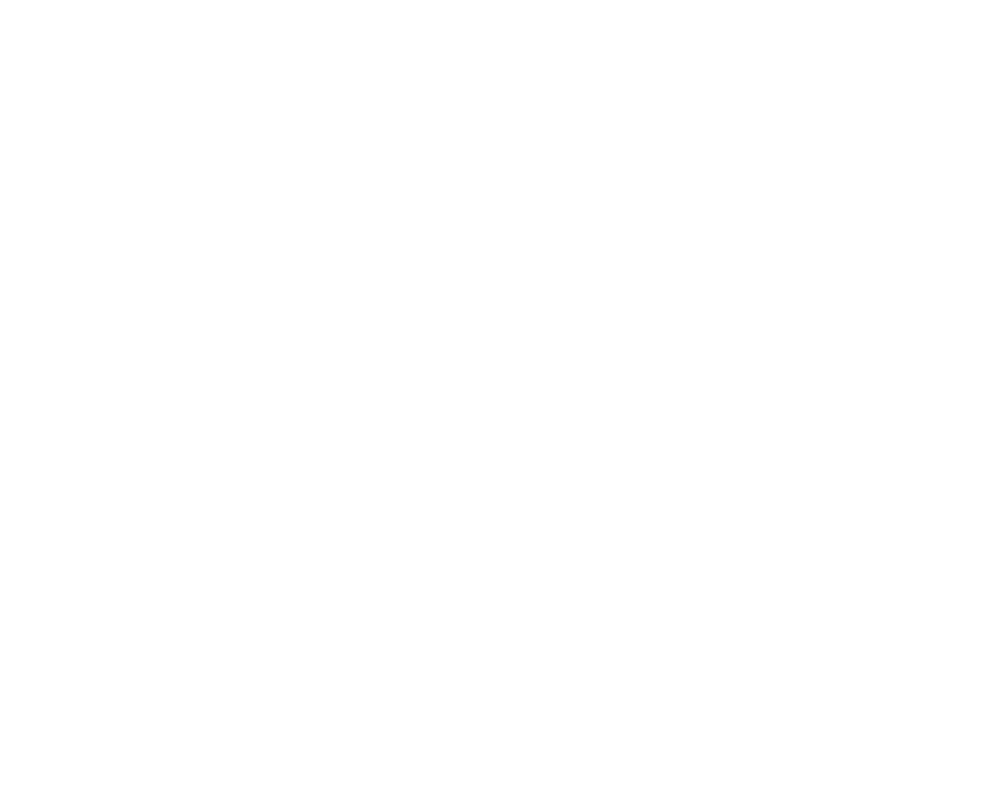

<IPython.core.display.Javascript object>


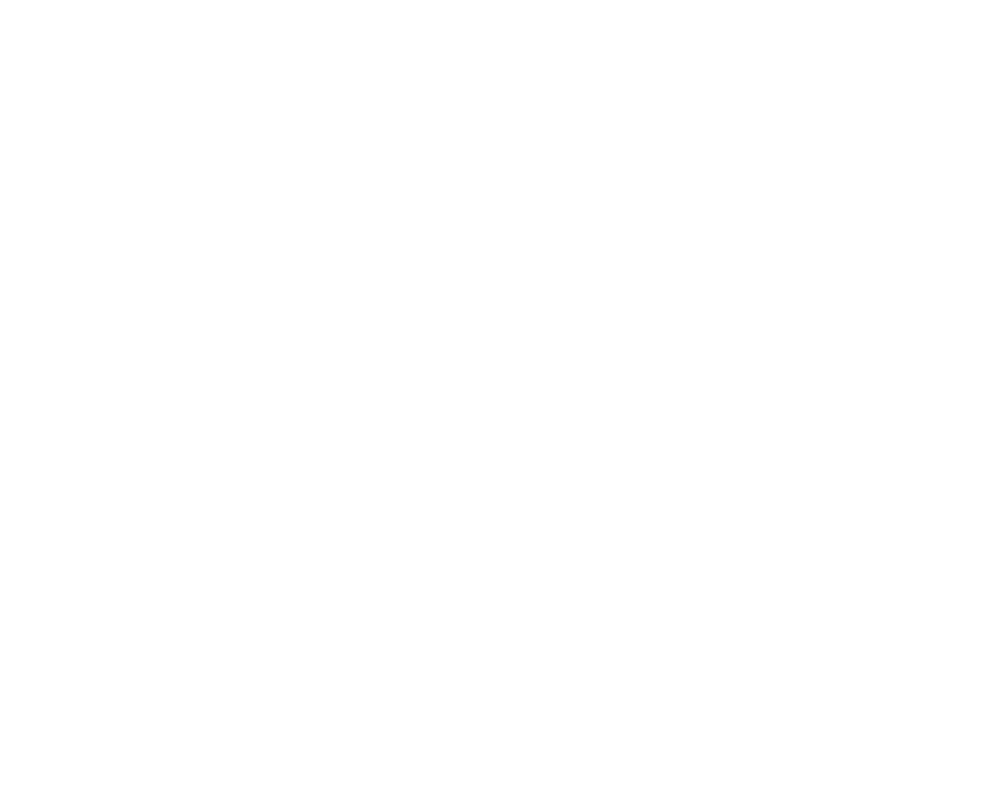

In [22]:
# for generating heatmap, you can use the code below or write your own
%matplotlib notebook
dataset = load_boston()
sns.set(style="white")
# Get correlation matrix
df = (pd.DataFrame(dataset.data, columns= dataset.feature_names))
df['target'] = dataset.target
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.9, cbar_kws={"shrink": .7})

=======================================================================================================================

<b>Problem #4-4 </b> Scatter plot [4 points]. <br> 

- Plot RM versus target variable 
- Plot TAX versus target variable 
- Plot LSTAT versus target variable <br> 
- Comment on each of the above plots. Is the relationship linear or non linear?


**Plot RM versus target variable**

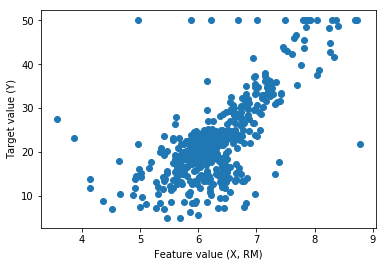

In [25]:
Y = dataset.target
X = dataset.data[:,[5]]

plt.scatter(X,Y,marker='o')
plt.xlabel('Feature value (X, RM)'); plt.ylabel('Target value (Y)')
plt.show()

**Plot TAX versus target variable**

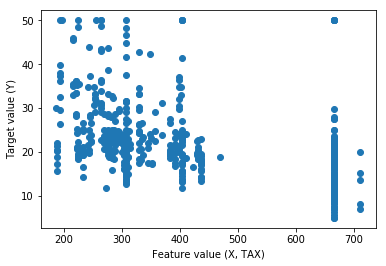

In [24]:
Y = dataset.target
X = dataset.data[:,[9]]

plt.scatter (X,Y,marker='o')
plt.xlabel('Feature value (X, TAX)'); plt.ylabel('Target value (Y)')
plt.show()

**Plot LSTAT versus target variable **

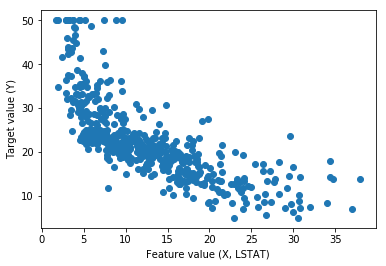

In [23]:
Y = dataset.target
X = dataset.data[:,[12]]

plt.scatter(X,Y,marker='o')
plt.xlabel('Feature value (X, LSTAT)'); plt.ylabel('Target value (Y)')
plt.show()

<h3>Answer:   </h3> <br>
<b> 
- Plot RM versus target variable (approximately linear)
- Plot TAX versus target variable  (nonlinear)
- Plot LSTAT versus target variable (approximately quadratic) 


=======================================================================================================================

<b>Problem #4-5.</b> 

- Feel free to use scikit-learn (sklearn library) or write your own code to answer the following questions..
- Use train_test_split() with "random_state=0

Answer the following questions  [10 pts]:

1. Fit a linear regression model with RM and LSTAT features only. Find the R-squared metric on train and test sets. 
2. Fit a linear regression model using RM, LSTAT and include the interaction term (RM * LSTAT). How R-squared metric differs from the previous model without interaction term?
3. Fit a linear regression model using LSTAT and include the polynomial term ( $LSTAT^2$).  Find the R-squared metric.
4. Fit linear regression model using LSTAT and include the polynomial term ( $LSTAT^2$ and $LSTAT^4$ ). Find the R-squared metric. 
- How does R-squared metric differ in the previous models ? <br> Comment your observation. 

**1.  Fit a linear regression model with RM and LSTAT features only**

In [24]:
# Data preprocessing

X_train,X_test,Y_train,Y_test=train_test_split(dataset.data,dataset.target,random_state=0)
pd_feature = pd.DataFrame(X_train, columns=dataset.feature_names)
pd_target = pd.DataFrame(Y_train, columns=['target'])
# Concatenate target and feature dataset
frames = [pd_feature, pd_target]
pd_dataset = pd.concat(frames, axis=1)

# using Statsmodels

# modelsmf = smf.ols('target ~ RM+LSTAT', pd_dataset)
# #modelsmf.fit().summary() #optional if you wanna see whole summary
# print ("Statsmodels model result of R-squared metric with RM and LSTAT features only:\n",modelsmf.fit().rsquared)

#=========================================================================================================================
# using Sklearn model
df = (pd.DataFrame(dataset.data, columns= dataset.feature_names))
df['target'] = dataset.target
Y = df['target']
X = df[["RM", "LSTAT"]]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0)
# Here we are creting dataset using only train data. 
frames = [X_train, Y_train]
pd_dataset = pd.concat(frames, axis=1)
modelLR = LinearRegression().fit(X_train,Y_train)
print("Sklearn model result of train R-squared metric with RM and LSTAT features only:\n", modelLR.score(X_train, Y_train))

print ("Use Test: Sklearn model result of R-squared metric with RM and LSTAT features only:\n", modelLR.score(X_test, Y_test))

Sklearn model result of train R-squared metric with RM and LSTAT features only:
 0.659784656989
Use Test: Sklearn model result of R-squared metric with RM and LSTAT features only:
 0.569244541584


**2 Fit a linear regression model using RM, LSTAT and include the interaction term (RM * LSTAT)**

In [26]:
# using Statsmodels
# modelsmf = smf.ols('target ~ RM+LSTAT+LSTAT*RM', pd_dataset)
# # modelsmf.fit().summary() #optional if you wanna see whole summary
# print ("Statsmodels model result of R-squared metric with RM LSTAT and term (RM * LSTAT):\n",modelsmf.fit().rsquared)

#=========================================================================================================================
# using Sklearn model
# Data preprocessing
df = (pd.DataFrame(dataset.data, columns= dataset.feature_names))
df['target'] = dataset.target
Y = df['target']
df['RMLSTAT'] = (df['RM']*df['LSTAT'])
X = df[['RM', 'LSTAT','RMLSTAT']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0)
modelLR2 = LinearRegression().fit(X_train,Y_train)
print("Sklearn model result of train R-squared metric with RM and LSTAT term (RM * LSTAT):\n", modelLR2.score(X_train, Y_train))
print("Use Test: Sklearn model result of R-squared metric with RM and LSTAT features only:\n", modelLR2.score(X_test, Y_test))

Sklearn model result of train R-squared metric with RM and LSTAT term (RM * LSTAT):
 0.764646332468
Use Test: Sklearn model result of R-squared metric with RM and LSTAT features only:
 0.661520770677


**3 Fit a linear regression model using LSTAT and include the polynomial term (  LSTAT^2 )**

In [27]:
# using Statsmodels
# modelsmf = smf.ols('target ~ LSTAT+I(LSTAT**2)', pd_dataset)
# # modelsmf.fit().summary() #optional if you wanna see whole summary
# print ("Statsmodels model result of R-squared metric with LSTAT and polynomial term ( LSTAT^2):\n",modelsmf.fit().rsquared)
#=========================================================================================================================
# using Sklearn model
# Data preprocessing
df = (pd.DataFrame(dataset.data, columns= dataset.feature_names))
df['target'] = dataset.target
Y = df['target']
df['LSTATSQ']=(df['LSTAT']*df['LSTAT'])
X = df[['LSTAT','LSTATSQ']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0)
modelLRSQ = LinearRegression().fit(X_train,Y_train)
print("Sklearn model result of R-squared metric with LSTAT and polynomial term ( LSTAT^2):\n", modelLRSQ.score(X_train, Y_train))
print("Use Test: Sklearn model result of R-squared metric with RM and LSTAT features only:\n", modelLRSQ.score(X_test, Y_test))

Sklearn model result of R-squared metric with LSTAT and polynomial term ( LSTAT^2):
 0.668789207899
Use Test: Sklearn model result of R-squared metric with RM and LSTAT features only:
 0.551875335414


**4. Fit linear regression model using LSTAT and include the polynomial term (  LSTAT^2  and  LSTAT^4)**

In [28]:
# using Statsmodels
# modelsmf = smf.ols('target ~ LSTAT+I(LSTAT**2)+I(LSTAT**4)', pd_dataset)
# # modelsmf.fit().summary() #optional if you wanna see whole summary
# print ("Statsmodels model result of R-squared metric with LSTAT and polynomial term (LSTAT^2 and LSTAT^4):\n",modelsmf.fit().rsquared)
#=========================================================================================================================
# using Sklearn model
# Data preprocessing
df = (pd.DataFrame(dataset.data, columns= dataset.feature_names))
df['target'] = dataset.target
Y = df['target']
df['LSTATSQ']=(df['LSTAT']*df['LSTAT'])
df['LSTAT4']=(df['LSTAT']*df['LSTAT']*df['LSTAT']*df['LSTAT'])
X = df[['LSTAT','LSTATSQ','LSTAT4']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0)
modelLRSQ = LinearRegression().fit(X_train,Y_train)
print("Sklearn model result of R-squared metric with LSTAT and polynomial term (LSTAT^2 and LSTAT^4):\n", modelLRSQ.score(X_train, Y_train))
print("Use Test: Sklearn model result of R-squared metric with RM and LSTAT features only:\n", modelLRSQ.score(X_test, Y_test))

Sklearn model result of R-squared metric with LSTAT and polynomial term (LSTAT^2 and LSTAT^4):
 0.680126729482
Use Test: Sklearn model result of R-squared metric with RM and LSTAT features only:
 0.569649312728


=========================================================================================================================

<b>Problem #4-6 .</b> Fit all features (13 features) in the dataset to a multiple linear regression model, and report p-values of all feature. 

<b> Answer the following questions [4 pts]:</b> 

- What does p-value represent?
- What are the features that have strong association with the target? what are the ones that seem to have week association? <br> 


In [29]:
# Data preprocessing
pd_feature = pd.DataFrame(dataset.data, columns=dataset.feature_names)
pd_target = pd.DataFrame(dataset.target, columns=['target'])
# Concatenate target and feature dataset
frames = [pd_feature, pd_target]
pd_dataset = pd.concat(frames, axis=1)
full_model = smf.ols('target ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT', pd_dataset)
full_model_result = full_model.fit()
print(full_model_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 19 Feb 2018   Prob (F-statistic):          6.95e-135
Time:                        08:26:33   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4911      5.104      7.149      0.0

<h3>Answer:   </h3> <br>
<b> 
- A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, hence strong association with the target.
- Most of the features look important (with low p-values). There are two insignificant features: INDUS and AGE.  

<h3>  Problem #5. Regularization [20 points] </h3>  
- Will be covered in lecture on Feb 11. 


- In this problem, we will use the same dataset as in previous question -- the Boston data set.
- Scale the features with StandardScaler

<b>Problem #5-1 [5 points].</b> Use Ridge regression model with tuning parameter set to 1 (alpha =1). Find the test $R^2$ score and number of non zero coefficients.

<b>Problem #5-2 [5 points].</b>  Use Lasso regression instead of Ridge regression, also set the tuning parameter to 1. Find the test $R^2$ score and number of non zero coefficients.

<b>Problem #5-3 [5 points].</b>  Change the tuning parameter of the Lasso model to a very low value (alpha =0.001). What is the $R^2$ score.

<b>Problem #4-4 [5 points].</b> Comment on your result. 


In [41]:
#try with scaling
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
from sklearn import preprocessing

dataset = load_boston()
X=dataset.data
Y=dataset.target
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state= 0)

scaler=preprocessing.StandardScaler().fit(X_train)
X_train_transformed=scaler.transform(X_train)
X_test_transformed=scaler.transform(X_test)

#A) Ridge regression, using tuning parameter of 100
RidgeModel100=Ridge(alpha=1).fit(X_train_transformed, Y_train) 
#find the R2 metric with the .score 
print("Score of Ridge Regression with tuning parameter =1 is: ", RidgeModel100.score(X_test_transformed,Y_test))
print("number of coef. that are not equal to zero with Ridge regression", np.sum(RidgeModel100.coef_!=0))


#B) Lasso regression, using tuning parameter of 100
LassoModel100=Lasso(alpha=1).fit(X_train_transformed, Y_train) 
print("Score of Lasso Regression with tuning parameter =1 is: ", LassoModel100.score(X_test_transformed,Y_test))
print("number of coef. that are not equal to zero with Lasso regression when alpha =100 is: ", np.sum(LassoModel100.coef_!=0))
print(LassoModel100.coef_)


#C) Lasso regression, using very small tuning parameter 
LassoModel001=Lasso(alpha=0.001).fit(X_train_transformed, Y_train) 
print("Score of Lasso Regression with tuning parameter =0.001 is: ", LassoModel001.score(X_test_transformed,Y_test))
print("number of coef. that are not equal to zero with Lasso regression when alpha =0.001 is: ", np.sum(LassoModel001.coef_!=0))
print(LassoModel001.coef_)


Score of Ridge Regression with tuning parameter =1 is:  0.634488468779
number of coef. that are not equal to zero with Ridge regression 13
Score of Lasso Regression with tuning parameter =1 is:  0.56560499121
number of coef. that are not equal to zero with Lasso regression when alpha =100 is:  5
[-0.          0.         -0.          0.         -0.          2.52932703
 -0.         -0.         -0.         -0.22763273 -1.70088279  0.13185783
 -3.60565774]
Score of Lasso Regression with tuning parameter =0.001 is:  0.635252342477
number of coef. that are not equal to zero with Lasso regression when alpha =0.001 is:  13
[-0.95986801  1.0425271  -0.03934234  0.59420176 -1.80873012  2.60600865
 -0.193908   -2.99487883  2.06267675 -1.91999209 -2.15872068  0.76071723
 -3.59753802]


##### Comment

- It is clear from the results above that with Ridge regression, non of the coefficients is zero. Using Lasso regression with the same value of the tuning paramter, 8 coefficients are equal to zero. 

- With a low value for the tuning paramter, non of the coefficients are equal to zero with Lasso. It is expected that this result will be simiar to OLS with no regularization (you can check that in a straightforward manner).

- Results implies that most features are important in predicting the response.


==========================================================================+============================================== <br> =========================================================================================================================

### Submission
Once you completed the assignment, <br>
Name your file in the format of <b style='color:red'>LASTNAME-PITTID-Assignment1.ipynb</b>, and submit it on the courseweb